# Dimensionality Reduction

In today's lcture:
 - Introduction to dimensionality reduction via PCA
 - Explore classifications with reduced data 
 - Unsupervised classification & clustering 

High-dimensional data, where datasets have a large number of attributes or features, presents challenges in visualization, computation, and sometimes, interpretation. This is where Principal Component Analysis (PCA), one of the most popular dimensionality reduction techniques, comes into play.

PCA is a statistical method that transforms a high-dimensional dataset into a lower-dimensional space, making it easier to visualize and often speeding up other data analysis tasks. But PCA doesn't merely reduce the data's dimensionality: it aims to capture the most significant structures in the data, preserving as much variability as possible. This is achieved by identifying the "directions" (or principal components) in which the data varies the most and projecting the data onto these directions.

The principal components themselves are linear combinations of the original features, orthogonal to each other, ensuring no redundant information. The first principal component captures the highest variance in the data, the second principal component (which is orthogonal to the first) captures the second most, and so on. By representing data in terms of these components, PCA provides a way to express data in a reduced number of dimensions that retains the data's essential structures.

To illustrate, imagine a cloud of data points in three-dimensional space that lies mostly on a flat surface. While the data is three-dimensional, its intrinsic structure can be captured using just two dimensions: the surface. PCA identifies this surface and enables us to represent each data point by its coordinates on the surface rather than in the full three-dimensional space.

## How do we compute PCA?

Standardize the data

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

# Standardize the data
X_std = StandardScaler().fit_transform(X)

Calculate the covariance matrix

In [8]:
covariance_matrix = np.cov(X_std.T)

Compute Eigenvalues and Eigenvectors

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

Sort by descending eigenvalues. This will help in deciding which eigenvector(s) can be dropped without losing significant information.

In [11]:
# Create pairs (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Sort the pairs based on the eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [16]:
eig_pairs

[(2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624864,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449475,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462696,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Choose the top k eigenvectors. For this example, we'll reduce to 2 dimensions:

In [17]:
num_components = 2
matrix_w = np.hstack([eig_pairs[i][1].reshape(X_std.shape[1], 1) for i in range(num_components)])

In [18]:
matrix_w

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

Transorm the original data

In [19]:
X_pca = X_std.dot(matrix_w)

In [22]:
X_std.shape

(150, 4)

In [23]:
X_pca.shape

(150, 2)

Let's plot the result for visual inspections

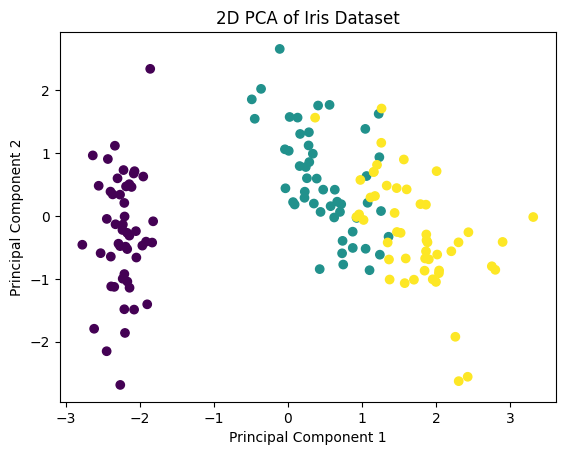

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.show()

Examine variance explained

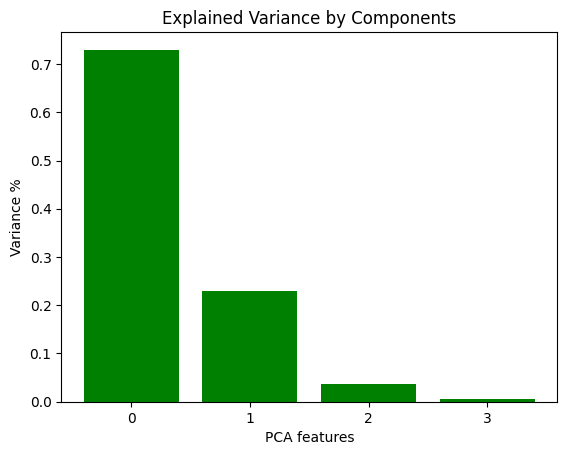

In [25]:
import numpy as np

# Fit PCA
pca = PCA().fit(X_std)

# Plotting the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.title('Explained Variance by Components')
plt.show()

### How can we intuitively imagine what is PCA doing?

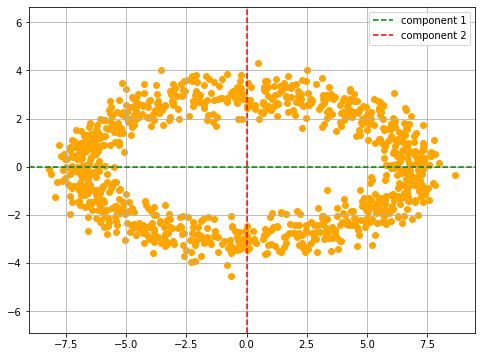

In [18]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 1000)
a = 7  # Semi-major axis length
b = 3  # Semi-minor axis length

x = a * np.cos(theta)
y = b * np.sin(theta)
x += np.random.normal(0, 0.5, x.shape)
y += np.random.normal(0, 0.5, y.shape)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='orange', marker='o')
plt.axhline(y=0, color='green', linestyle='--', label="component 1")
plt.axvline(x=0, color='red', linestyle='--', label="component 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

0) Imagine a 2d scatter  of a set of points, in rough elliptic shape 

1) Find the center of the scatter

2) Draw the line of maximum variance that goes through the center (principal component)

3) Draw a line that is perpendicular to the first still through the center (second component)

4) Project the points on the first line, obtain a 2D->1D dimensionality reduction.  

### Use cases of pca

- Visualization: High-dimensional data can be projected into 2D or 3D space for visualization, allowing for easier identification of patterns or clusters.
 - Noise Reduction: By considering only the top principal components (those capturing the highest variance), one can filter out noise which typically resides in the lower-variance components.
 - Data Compression: Storing data in terms of its principal components rather than its original features can lead to significant reductions in storage requirements.
 - Speeding Up Machine Learning Algorithms: Algorithms can train faster on lower-dimensional data.

Visualization of PCA with two components for "digits"

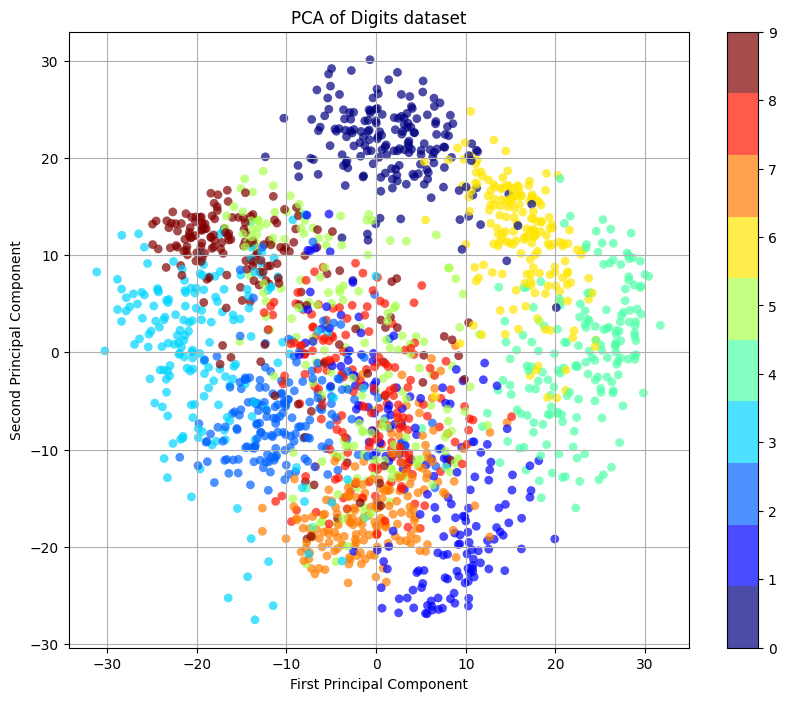

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Applying PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.7,
            cmap=plt.get_cmap('jet', 10), s=40)
plt.colorbar(scatter)
plt.title('PCA of Digits dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

Let's try iris classification with and without PCA, to see how dimensionality reduction affects performance

In [34]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.4, random_state=42)

Train classifiers on the original dataset

In [37]:

lr = LogisticRegression()
rf = RandomForestClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

lr_acc_original = accuracy_score(y_test, lr_pred)
rf_acc_original = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy (Original): {lr_acc_original:.4f}")
print(f"Random Forest Accuracy (Original): {rf_acc_original:.4f}")


Logistic Regression Accuracy (Original): 0.9833
Random Forest Accuracy (Original): 0.9833


Train classifiers on the reduced dataset

In [36]:
# Apply PCA and reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr.fit(X_train_pca, y_train)
rf.fit(X_train_pca, y_train)

lr_pred_pca = lr.predict(X_test_pca)
rf_pred_pca = rf.predict(X_test_pca)

lr_acc_pca = accuracy_score(y_test, lr_pred_pca)
rf_acc_pca = accuracy_score(y_test, rf_pred_pca)

print(f"\nLogistic Regression Accuracy (PCA): {lr_acc_pca:.4f}")
print(f"Random Forest Accuracy (PCA): {rf_acc_pca:.4f}")


Logistic Regression Accuracy (PCA): 0.9333
Random Forest Accuracy (PCA): 0.9500
